In [ ]:
# !pip install matplotlib==3.4.3
# !pip install --upgrade statsmodels

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

/tmp/ipykernel_2339/3303364975.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Data Frame


### Ex 1

The file lightbulbs.csv contains a random sample of
100 lightbulb lifetimes. The company that produces
these lightbulbs wants to know whether it can claim
that its lightbulbs typically last more than 1000 burning
hours.
1. Identify the null and alternative hypotheses for this
situation.
2. Can this lightbulb manufacturer claim that its
lightbulbs typically last more than 1000 hours at
the 5% significance level? What about at the 1%
significance level?


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Lightbulbs.csv', sep=";")
df.head()

,Lightbulb,Lifetime
0,1,840.08
1,2,960.00
2,3,953.38
3,4,981.14
4,5,938.66


H0 = The lightbulbs don't last more than 1000 burning hours
H1 = The lightbulbs last more than 1000 burning hours

In [7]:
#General checks
print(df.Lifetime.mean())
print(df.Lifetime.count())


991.0186000000001
100


In [11]:
alpha = 0.05
n = df.Lifetime.count()
m_sample = df.Lifetime.mean()
mu = 1000
sample_sigma = df.Lifetime.std()
p = stats.norm.sf(m_sample,loc=mu,scale=sample_sigma)
print(p)
print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")
    # conclusie: Er is onvoldoende aanwzijing om H0 te verwerpen. De bulbs gaan niet langer dan 1000 uur mee.

0.54103264966644
p-value: 0.54103
p > alpha: do not reject H0


In [12]:
g = stats.norm.isf(alpha, loc=mu, scale=sample_sigma) #Kijken wat de critical value is op limiet 5%
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 1143.378
sample mean = 991.019 < g = 1143.378: do not reject H0


In [13]:
# met alpha = 0.01
alpha = 0.01
n = df.Lifetime.count()
m_sample = df.Lifetime.mean()
mu = 1000
sample_sigma = df.Lifetime.std()
p = stats.norm.sf(m_sample,loc=mu,scale=sample_sigma)
print(p)
print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

g = stats.norm.isf(alpha, loc=mu, scale=sample_sigma) #Kijken wat de critical value is op limiet 5%
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

0.54103264966644
p-value: 0.54103
p > alpha: do not reject H0
Critical value g ≃ 1202.783
sample mean = 991.019 < g = 1202.783: do not reject H0


The other way around can people claim that it lasts less than 1000 hours?

In [16]:
# Bij alpha = 0.05
alpha = 0.05
p = stats.norm.cdf(m_sample, loc=mu, scale=sample_sigma) 

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < a, reject H0")
else:
    print("p > a, do not reject H0")

g = stats.norm.isf(1-alpha, loc=mu, scale=sample_sigma)
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))

p-value: 0.45897
p > a, do not reject H0
Critical value g ≃ 856.622
sample mean = 991.019 > g = 856.622: do not reject H0


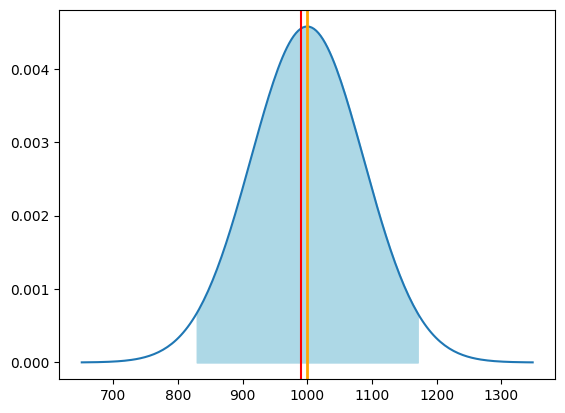

In [17]:
g1 = mu - stats.norm.isf(alpha/2) * sample_sigma # Ondergrens
g2 = mu + stats.norm.isf(alpha/2) * sample_sigma # Bovengrens
# Gauss-curve
# X-values
dist_x = np.linspace(mu - 4 * sample_sigma, mu + 4 * sample_sigma, num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mu, scale=sample_sigma)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=mu, scale=sample_sigma)
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue');

### Ex 2

The file Low calorie soft drinks.csv categorizes 250 randomly
selected consumers on the basis of their gender, their
age, and their preference for our brand or a competitor's
brand of a low-calorie soft drink.   
First make a stacked barplot.  
Then use a test to see whether the drink
preference is independent of gender.

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Low%20calorie%20soft%20drinks.csv', sep=";")
df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


<Axes: xlabel='Gender'>

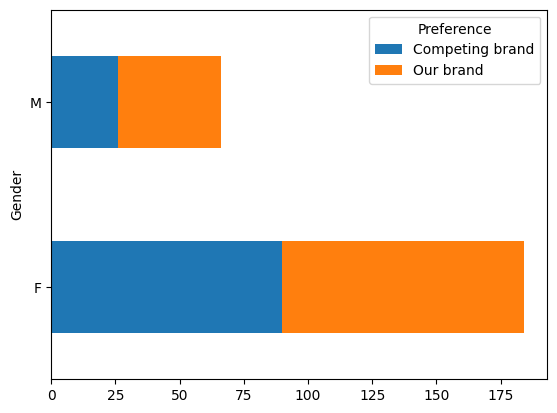

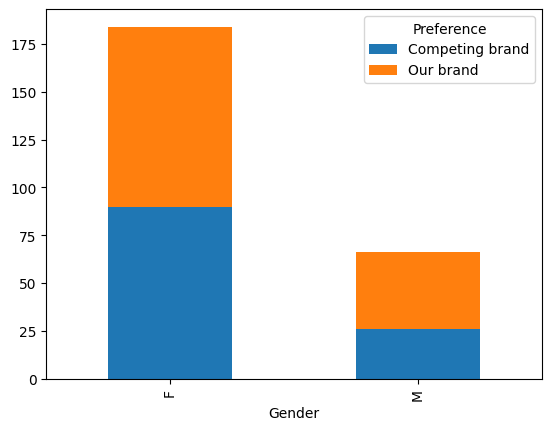

In [20]:
# Contingency table without the margins
observed = pd.crosstab(df.Gender, df.Preference)

# Horizontally oriented stacked bar chart
observed.plot(kind='barh', stacked=True)
# barh = horizontal barchart, als je 'bar' gebruikt, is het een vertical barchart
observed.plot(kind='bar', stacked=True)

In [21]:
observed = pd.crosstab(df.Gender, df.Preference)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)
# Conclusie: P-value = 23,5% > 5% => Niet voldoende reden om H0 te verwerpen
# Er bestaat geen verband tussen het geslacht en de voorkeur voor ons merk of het andere merk.


Chi-squared       : 1.4078
Degrees of freedom: 1
P-value           : 0.2354


# Ex 3
The owner of Original Italian Pizza restaurant chain
wants to understand which variable most strongly
influences the sales of his specialty deep-dish
pizza. He has gathered data on the monthly sales of
deep-dish pizzas at his restaurants and observations on
other potentially relevant variables for each of several
outlets in central Indiana. These data are provided in
the file pizzas.csv. Estimate a simple linear regression
equation between the quantity sold (Y) and each
of the following candidates for the best explanatory
variable: average price of deep-dish pizzas, monthly
advertising expenditures, and disposable income per
household in the areas surrounding the outlets. Which
variable is most strongly associated with the number
of pizzas sold? Explain your choice.  
Start by transforming the text values to a float. Divide Quantity Sold, Monthly Advertising Expenditures and Disposable Income Per Househols by 100.  
Make a plot  

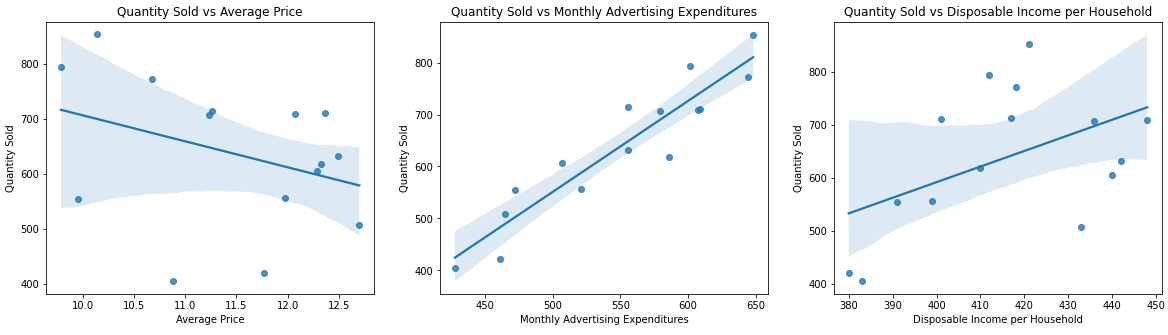

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/pizzas.csv', sep=";")
df.head()

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,85 300,"$10,14",$64 800,$42 100
1,2,40 500,"$10,88",$42 800,$38 300
2,3,61 800,"$12,33",$58 600,$41 000
3,4,50 800,"$12,70",$46 500,$43 300
4,5,60 600,"$12,29",$50 700,$44 000


In [45]:
columns_to_convert = ['Quantity Sold','Average Price', 'Monthly Advertising Expenditures', 'Disposable Income per Household']

for column in columns_to_convert:
    df[column] = df[column].str.replace('$', '').str.replace(',', '.').str.replace(' ', '').astype(float)
    if (column != 'Average Price'):
        df[column] = df[column] / 100

df.head(100)

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,853.0,10.14,648.0,421.0
1,2,405.0,10.88,428.0,383.0
2,3,618.0,12.33,586.0,410.0
3,4,508.0,12.70,465.0,433.0
4,5,606.0,12.29,507.0,440.0
5,6,794.0,9.79,601.0,412.0
6,7,714.0,11.26,556.0,417.0
7,8,707.0,11.23,579.0,436.0
8,9,556.0,11.97,521.0,399.0
9,10,709.0,12.07,607.0,448.0


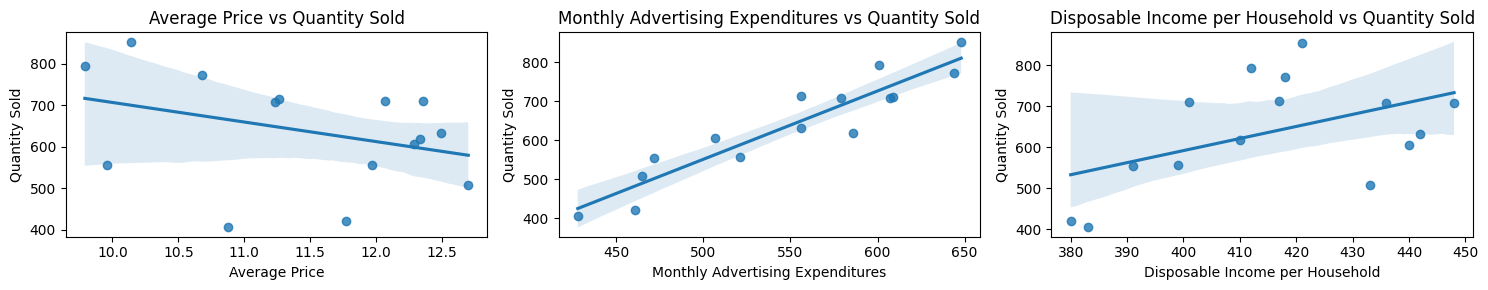

In [46]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
sns.regplot(data=df, x='Average Price', y='Quantity Sold',ax=axs[0])
axs[0].set_title('Average Price vs Quantity Sold')
sns.regplot(data=df, x='Monthly Advertising Expenditures', y='Quantity Sold',ax=axs[1]);
axs[1].set_title('Monthly Advertising Expenditures vs Quantity Sold')
sns.regplot(data=df, x='Disposable Income per Household', y='Quantity Sold',ax=axs[2]);
axs[2].set_title('Disposable Income per Household vs Quantity Sold')
plt.tight_layout()
plt.show()